In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from prince import FAMD
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos
df_fraude = pd.read_csv('fraud_test.csv', sep=",")
#df_fraude = pd.read_csv('/content/drive/MyDrive/Curso Ingenias/fraud_test.csv', sep=",")
df_fraude.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
#Separar la fecha y la hora en columnas distintas

# Convertir la columna 'trans_date_trans_time' a tipo datetime
df_fraude['trans_date_trans_time'] = pd.to_datetime(df_fraude['trans_date_trans_time'])

# Crear nuevas columnas para la fecha y la hora
df_fraude['fecha'] = df_fraude['trans_date_trans_time'].dt.date
df_fraude['hora'] = df_fraude['trans_date_trans_time'].dt.time

# Mostrar las primeras filas para verificar
print(df_fraude[['trans_date_trans_time', 'fecha', 'hora']].head())

#Separar la fecha de nacimiento en nuevas columnas:
# Asegúrate de que 'dob' esté en formato datetime
df_fraude['dob'] = pd.to_datetime(df_fraude['dob'], dayfirst=True)

# Crear nuevas columnas para el año, mes y día de nacimiento
df_fraude['anio_nacimiento'] = df_fraude['dob'].dt.year
df_fraude['mes_nacimiento'] = df_fraude['dob'].dt.month
df_fraude['dia_nacimiento'] = df_fraude['dob'].dt.day

# Mostrar las primeras filas para verificar
print(df_fraude[['dob', 'anio_nacimiento', 'mes_nacimiento', 'dia_nacimiento']].head())

C:\Users\bever\AppData\Local\Temp\ipykernel_16296\1755430550.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_fraude['trans_date_trans_time'] = pd.to_datetime(df_fraude['trans_date_trans_time'])


  trans_date_trans_time       fecha      hora
0   2020-06-21 12:14:00  2020-06-21  12:14:00
1   2020-06-21 12:14:00  2020-06-21  12:14:00
2   2020-06-21 12:14:00  2020-06-21  12:14:00
3   2020-06-21 12:15:00  2020-06-21  12:15:00
4   2020-06-21 12:15:00  2020-06-21  12:15:00
         dob  anio_nacimiento  mes_nacimiento  dia_nacimiento
0 1968-03-19             1968               3              19
1 1990-01-17             1990               1              17
2 1970-10-21             1970              10              21
3 1987-07-25             1987               7              25
4 1955-07-06             1955               7               6


In [4]:
#Calcular la Edad:

# Definir la función calcular_edad
def calcular_edad(fecha_nacimiento, fecha_actual):
    edad = fecha_actual.year - fecha_nacimiento.year
    if fecha_actual.month < fecha_nacimiento.month or (fecha_actual.month == fecha_nacimiento.month and fecha_actual.day < fecha_nacimiento.day):
        edad -= 1
    return edad

# Convertir la columna 'trans_date_trans_time' a tipo datetime
df_fraude['trans_date_trans_time'] = pd.to_datetime(df_fraude['trans_date_trans_time'])

# Crear nuevas columnas para la fecha y la hora
df_fraude['fecha'] = df_fraude['trans_date_trans_time'].dt.date
df_fraude['hora'] = df_fraude['trans_date_trans_time'].dt.time

# Convertir la columna 'dob' a tipo datetime, especificando el formato
df_fraude['dob'] = pd.to_datetime(df_fraude['dob'], dayfirst=True)

# Obtener la fecha actual o usar una columna específica
fecha_actual = pd.to_datetime('today').date()

# Calcular la edad basado en la fecha de la transacción o fecha actual
df_fraude['edad'] = df_fraude['dob'].apply(lambda dob: calcular_edad(pd.to_datetime(dob).date(), fecha_actual))

# Mostrar las primeras filas para verificar
print(df_fraude[['dob', 'edad', 'fecha', 'hora']].head())

         dob  edad       fecha      hora
0 1968-03-19    56  2020-06-21  12:14:00
1 1990-01-17    34  2020-06-21  12:14:00
2 1970-10-21    53  2020-06-21  12:14:00
3 1987-07-25    37  2020-06-21  12:15:00
4 1955-07-06    69  2020-06-21  12:15:00


In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pandas as pd


# Seleccionar una muestra aleatoria de 5000 filas
df_sample = df_fraude.sample(n=5000, random_state=42)


# Preprocesar datos (escalado)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'edad', 'zip']])


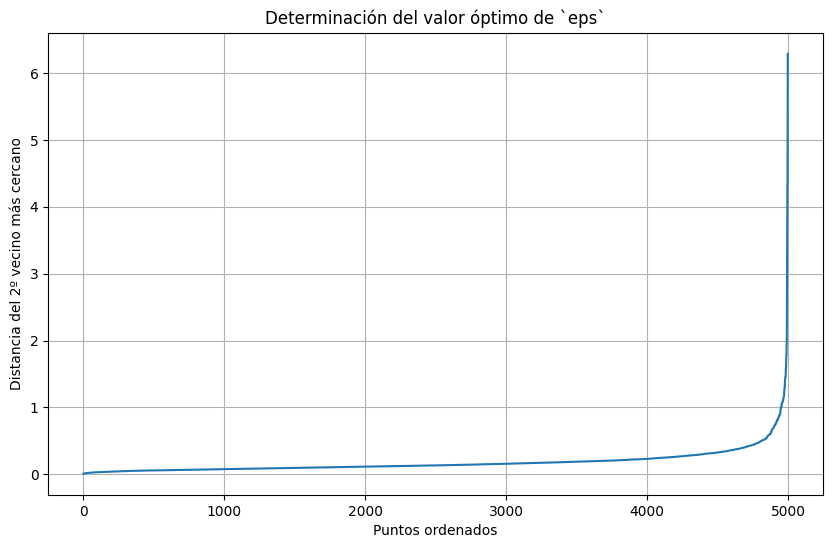

In [6]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Ajusta el modelo de vecinos más cercanos
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_scaled)  # Utiliza los datos escalados
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Graficar las distancias
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia del 2º vecino más cercano')
plt.title('Determinación del valor óptimo de `eps`')
plt.grid(True)
plt.show()


In [8]:
# Aplicar DBSCAN
eps = 0.9  # Ajusta según la gráfica anterior
min_samples = 10
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
pred_labels = dbscan.fit_predict(X_scaled)


In [9]:
# Contar el número de observaciones en cada cluster
import numpy as np

counts = np.bincount(pred_labels[pred_labels >= 0])
smallest_clusters = np.argsort(counts)[:3]  # Selecciona los 3 clusters más pequeños

print("Los clusters más pequeños son:", smallest_clusters)
print("Sus tamaños son:")
print(counts[smallest_clusters])

Los clusters más pequeños son: [ 7 11 12]
Sus tamaños son:
[10 10 10]


In [10]:
# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = pred_labels

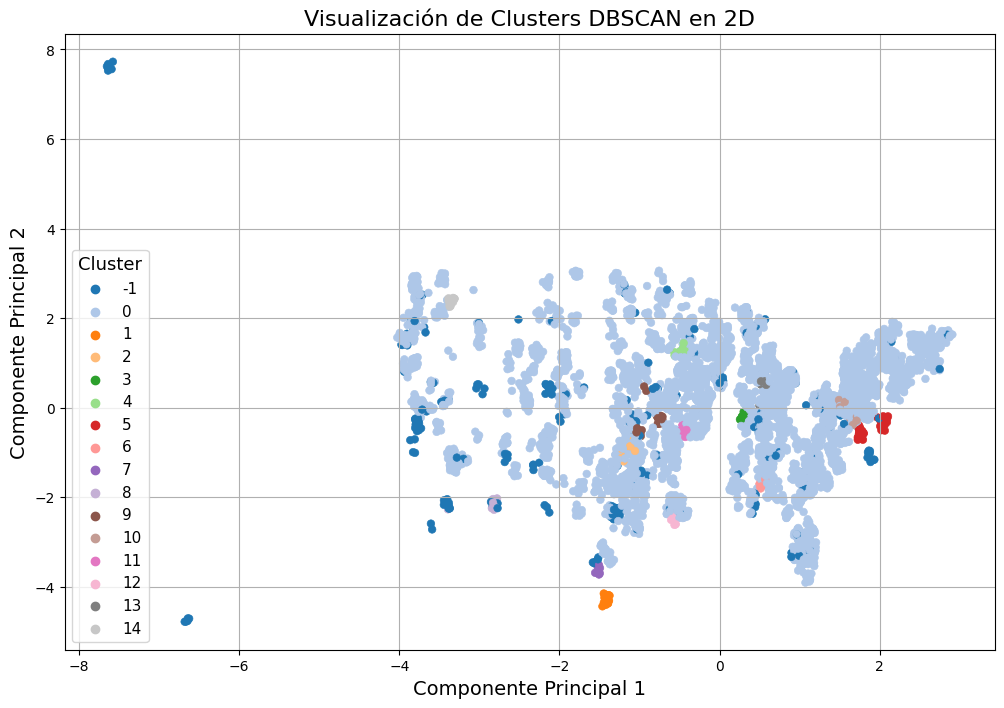

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir una paleta de colores personalizada
num_clusters = len(df_pca['Cluster'].unique())  # Número de clusters únicos
palette = sns.color_palette("tab20", num_clusters)  # "tab20" tiene colores más contrastantes

# Visualización en 2D con puntos más pequeños y colores ajustados
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette=palette, s=30, legend='full', edgecolor=None)

# Ajustar detalles de la leyenda
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles, labels, title='Cluster', title_fontsize='13', loc='best', fontsize='11')

plt.title('Visualización de Clusters DBSCAN en 2D', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.grid(True)
plt.show()




c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-p

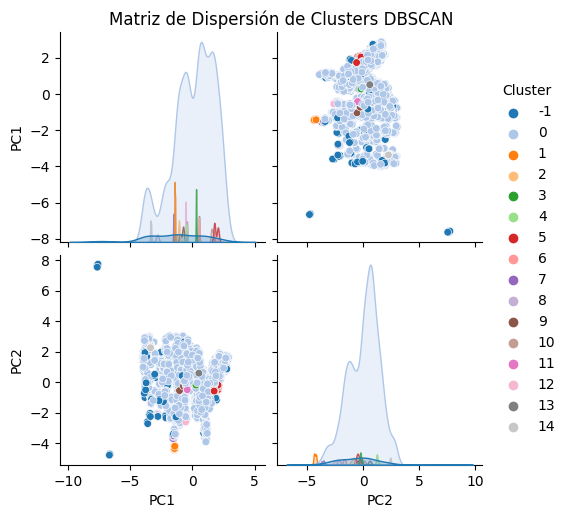

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de pares de componentes principales
sns.pairplot(df_pca, hue='Cluster', palette=palette, plot_kws={'s': 30})
plt.suptitle('Matriz de Dispersión de Clusters DBSCAN', y=1.02)
plt.show()



c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-p

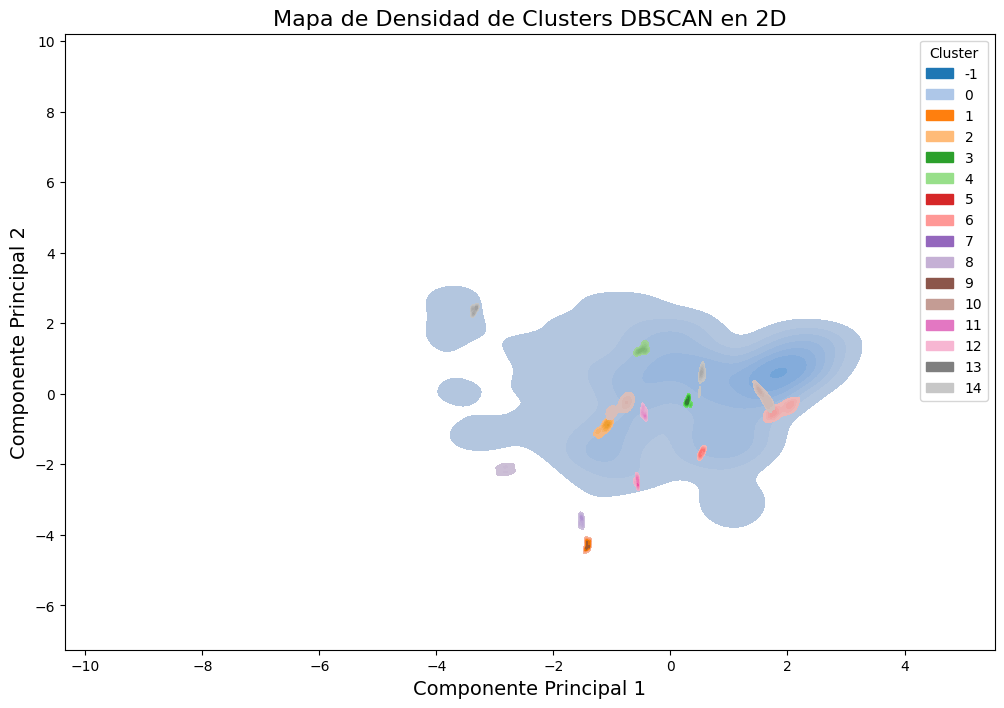

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette=palette, fill=True)
plt.title('Mapa de Densidad de Clusters DBSCAN en 2D', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.show()


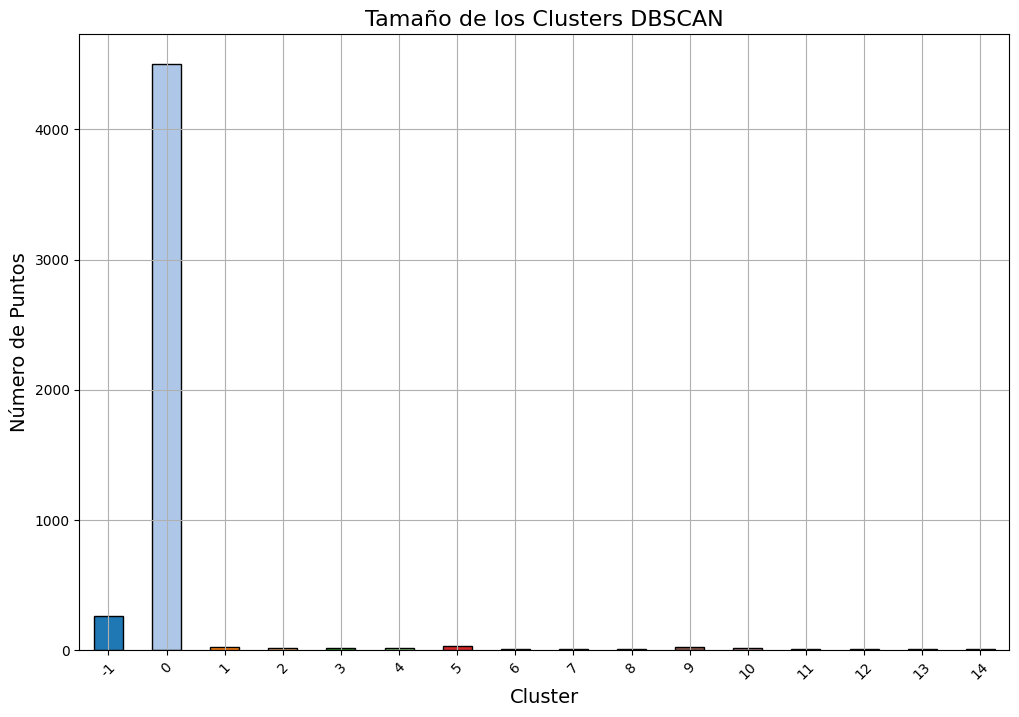

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar las observaciones en cada cluster
cluster_sizes = df_pca['Cluster'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
cluster_sizes.plot(kind='bar', color=palette, edgecolor='black')
plt.title('Tamaño de los Clusters DBSCAN', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Número de Puntos', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


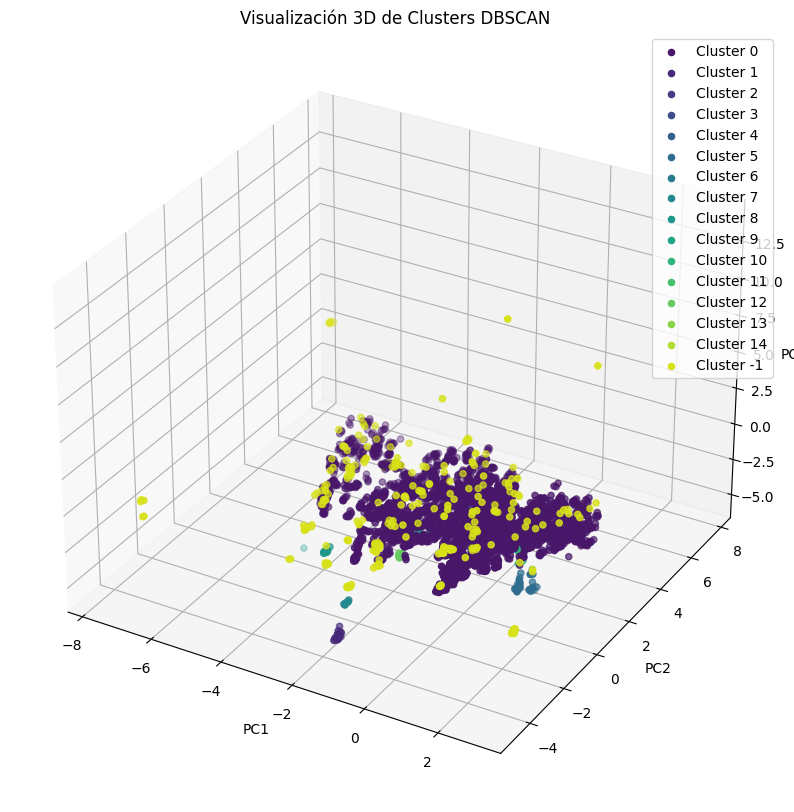

In [19]:
# Visualización en 3D
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = pred_labels

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
colors = sns.color_palette("viridis", len(set(pred_labels)))

for cluster_id in set(pred_labels):
    cluster_data = df_pca[df_pca['Cluster'] == cluster_id]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster_id}', color=colors[cluster_id % len(colors)], s=20)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualización 3D de Clusters DBSCAN')
ax.legend()
plt.show()

c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-p

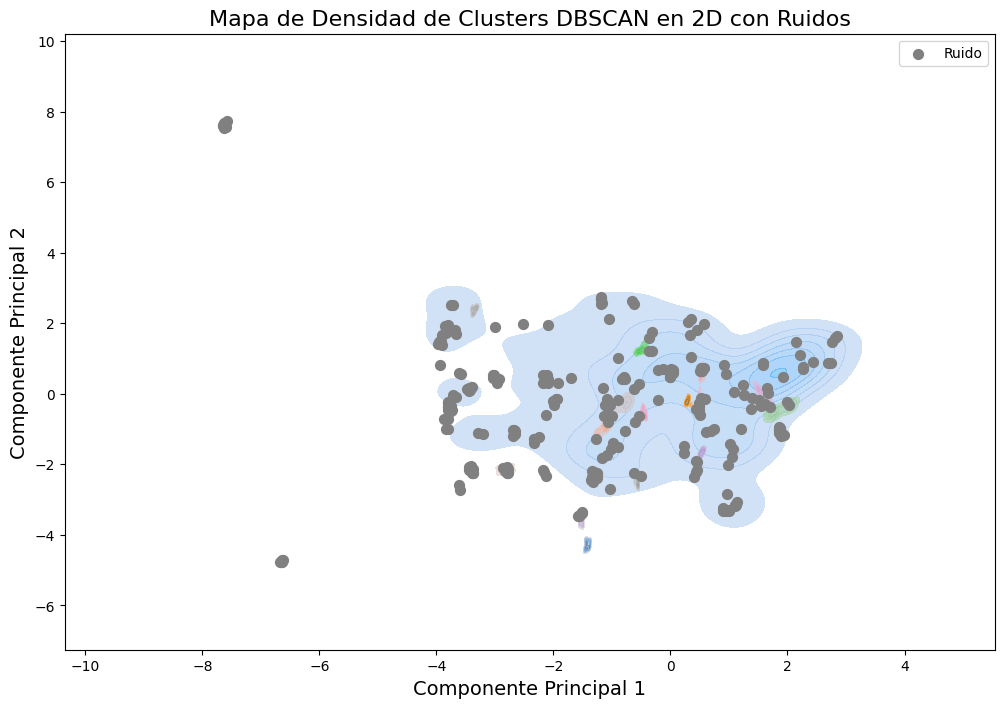

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de densidad en 2D
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette=palette, fill=True, alpha=0.5)
plt.scatter(df_pca[df_pca['Cluster'] == 'Ruido']['PC1'], df_pca[df_pca['Cluster'] == 'Ruido']['PC2'], color='grey', s=50, label='Ruido', edgecolor=None)

plt.title('Mapa de Densidad de Clusters DBSCAN en 2D con Ruidos', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.legend()
plt.show()


c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (17) than needed (16), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bever\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

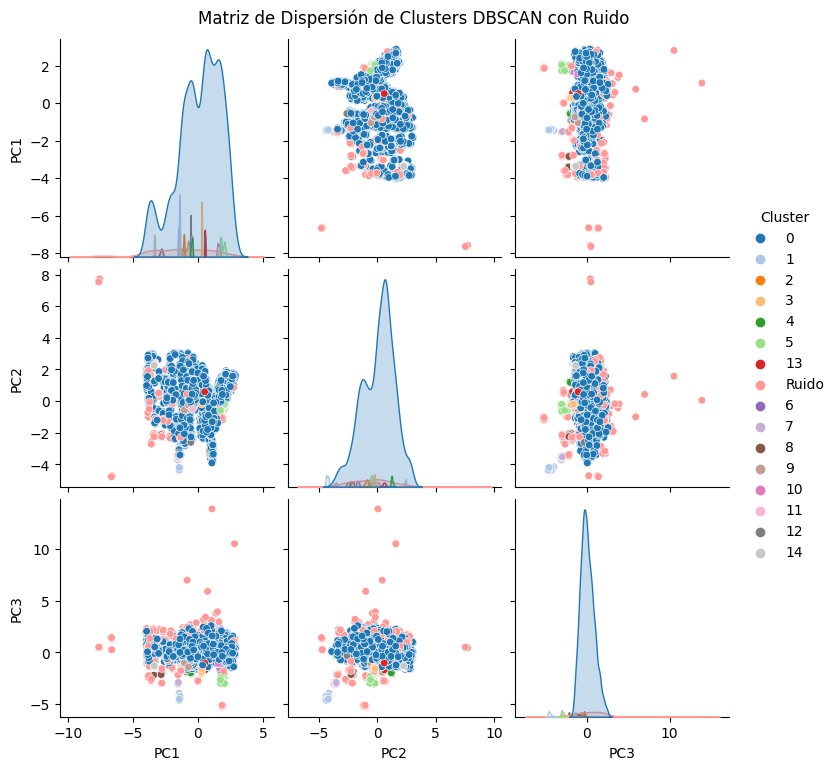

In [23]:
# Supongamos que df_pca ya contiene las columnas 'PC1', 'PC2', 'PC3' y 'Cluster'
# Convertir etiquetas de cluster a string y reemplazar -1 (ruido) por 'Ruido'
df_pca['Cluster'] = df_pca['Cluster'].astype(str)
df_pca['Cluster'] = df_pca['Cluster'].replace('-1', 'Ruido')

# Definir una paleta de colores personalizada que incluya el ruido
num_clusters = len(df_pca['Cluster'].unique())  # Número de clusters únicos
palette = sns.color_palette("tab20", num_clusters) + ["grey"]  # Añadir color para el ruido

# Visualización de pares de componentes principales
sns.pairplot(df_pca, hue='Cluster', palette=palette, plot_kws={'s': 30})

# Ajustar el título
plt.suptitle('Matriz de Dispersión de Clusters DBSCAN con Ruido', y=1.02)

# Mostrar el gráfico
plt.show()
